In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Boston.csv')
boston_df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


    
    Attribute Information (in order):
    
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

#### Data Manipulation

    * Test for Misisng Data

In [4]:
boston_df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

#### Assumptions 

    * Probability Distribution of Target(MEDV) must be normal.

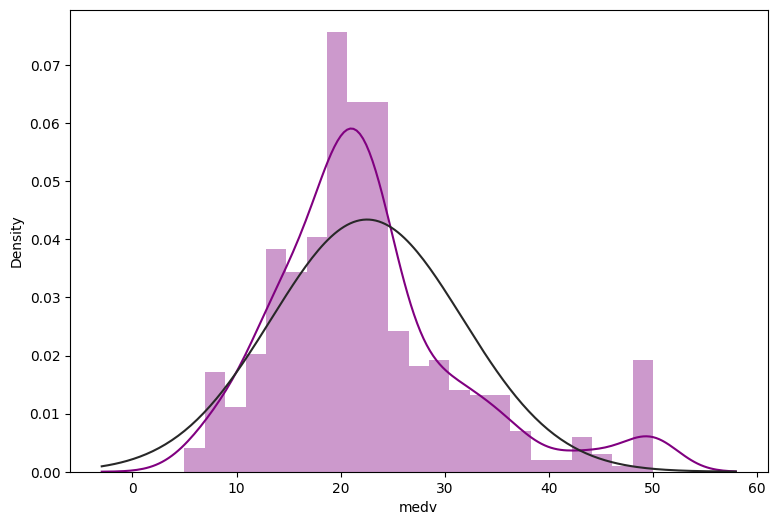

In [8]:
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
plt.figure(figsize = (9,6))
sns.distplot(boston_df['medv'], color = 'purple', fit = norm)
plt.show() 

##### Q-Q Plot

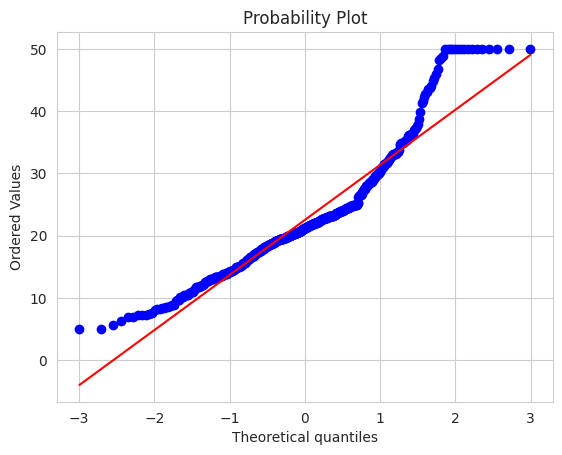

In [10]:
from scipy import stats
sns.set_style('whitegrid')
fig = plt.figure()
stats.probplot(boston_df['medv'], plot = plt)
plt.show()

##### Correlation

    * If correlation b/w features (x1, x2, x3 ..) is higly correlated i.e. either it is closer to -1 or +1. (Threshold = +- 0.85)

In [12]:
boston_df.drop('Unnamed: 0', axis = 1, inplace = True)

##### Correlation

In [13]:
boston_df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


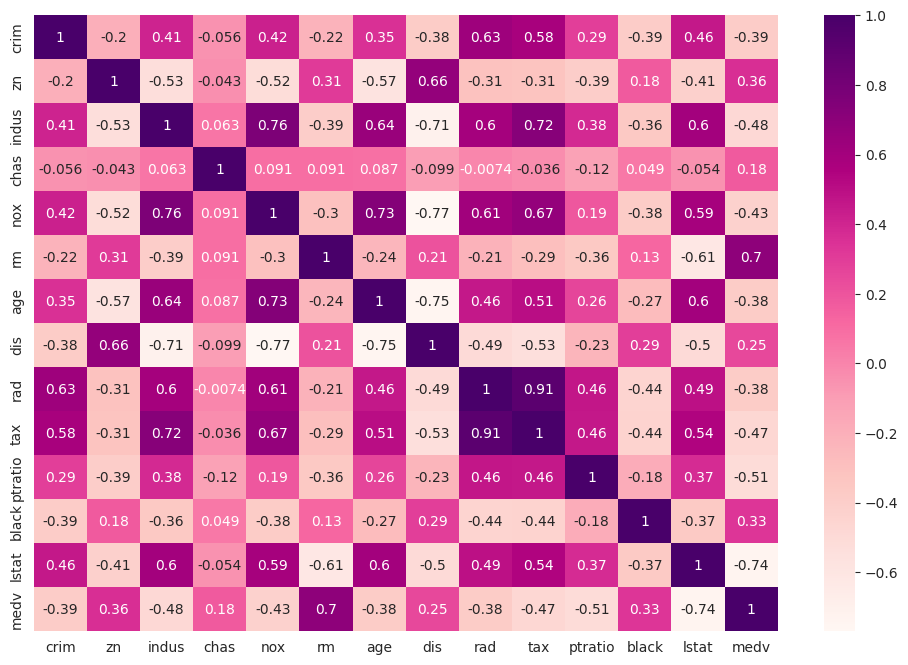

In [15]:
plt.figure(figsize = (12,8))
sns.heatmap(boston_df.corr(), annot = True, cmap = 'RdPu')
plt.show()

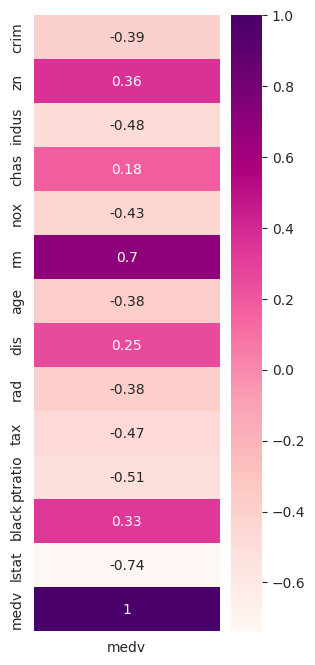

In [18]:
plt.figure(figsize = (3,8))
sns.heatmap(boston_df.corr()[['medv']], annot = True, cmap = 'RdPu')
plt.show()

##### Features & Target

In [19]:
X = boston_df.drop(['medv','rad','chas'], axis = 1)
Y = boston_df['medv']

##### Data Pre-Processing
    * Data Scaling

In [24]:
X

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48


In [25]:
# Normalized Features
from sklearn.preprocessing import MinMaxScaler
# change the scaler range b/w 0 to 1
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)

MinMaxScaler()

In [27]:
x_scaled = scaler.transform(X)

##### Cross-Validation : Splitting Train & Test

In [29]:
from sklearn.model_selection import train_test_split
# test_size = 20% , train size = 80%
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.2, random_state = 3)

##### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() 

In [31]:
# training of model 
lin_reg.fit(x_train,y_train)

LinearRegression()

In [32]:
# r2 score (R-Squared)
# R2 - (0-1)
lin_reg.score(x_test, y_test)

0.791176229496048

#### Regression Metrics

In [33]:
yhat = lin_reg.predict(x_test)

In [34]:
# r2-score, mean squared error, mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
# coefficient of determination
# 1 - RSS / TSS
r2_score(y_test, yhat)

0.791176229496048

In [36]:
# MSE
mean_squared_error(y_test, yhat)

17.281169981502302

In [37]:
# MAE
mean_absolute_error(y_test, yhat)

3.0888695103762442

In [38]:
# RMSE - Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, yhat))

4.157062662686515

In [39]:
Y.mean()

22.532806324110677

##### Make Predictions

In [41]:
X.head()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33


In [42]:
x_new = [[0.00532, 18.0, 7.31, 0.438,	6.575, 69.8, 4.0900, 246,	15.3,	387.10,	3.98]]

In [43]:
x_new_scaled = scaler.transform(x_new)

In [44]:
lin_reg.predict(x_new_scaled)

array([32.56035886])